# Import Python libraries

In [224]:
import os

import numpy as np
import pandas as pd
import requests
from sklearn import cluster
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing, neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier




# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# loading Data Set

In [225]:
def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

In [226]:
urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"]
load_dataset('data', urls)

In [227]:
columns = ['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num', 'Marital Status', 'Occupation', 'Relationship',
           'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country', 'Income']
train = pd.read_csv('data/adult.data', names=columns, na_values='?')

# Exploratory data analysis 

### Check shape of dataset

In [228]:
train.shape  ### We can see that there are 32561 instances and 15 attributes in the data set.

(32561, 15)

### Preview dataset

In [229]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [230]:
train.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### View summary of dataframe

In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [232]:
train.isin([' ?']).sum()  #checking data contains missing values

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

### replacing missing values with mode


In [233]:
# Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

#Impute missing values with mode
df=train
df = df.replace('?', np.NaN)

for col in ['Workclass', 'Occupation', 'Native country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [234]:
df.isnull().values.any()

False

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Now we can see that there are no missing values in the dataset.

In [236]:
X = df.drop(['Income'], axis=1)

y = df['Income']

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Engineering

## Encode categorical variables

In [238]:
from sklearn import preprocessing


categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native country']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [239]:
X_train

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
32098,45,4,170871,11,9,2,3,0,4,1,7298,0,60,39
25206,47,7,108890,11,9,0,1,4,4,0,1831,0,38,39
23491,48,4,187505,15,10,2,12,0,4,1,0,0,50,39
12367,29,4,145592,11,9,4,3,1,4,1,0,0,40,13
7054,23,4,203003,5,4,4,3,1,4,1,0,0,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,2,33331,12,14,2,4,0,4,1,0,0,40,39
19648,44,4,98466,0,6,4,5,4,4,1,0,0,35,39
9845,23,4,45317,15,10,5,12,3,4,0,0,0,40,39
10799,45,2,215862,10,16,2,4,0,4,1,7688,0,45,39


In [240]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [241]:
X_train

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,0.470399,0.091645,-0.174981,0.179166,-0.414963,-0.409687,-0.842289,-0.898445,0.396164,0.701715,0.826332,-0.216969,1.589744,0.290103
1,0.617346,2.157698,-0.763517,0.179166,-0.414963,-1.738219,-1.315337,1.591127,0.396164,-1.425079,0.098582,-0.216969,-0.200583,0.290103
2,0.690820,0.091645,-0.017034,1.216323,-0.025832,-0.409687,1.286425,-0.898445,0.396164,0.701715,-0.145156,-0.216969,0.775959,0.290103
3,-0.705178,0.091645,-0.415016,0.179166,-0.414963,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-0.037826,-3.019607
4,-1.146019,0.091645,0.130127,-1.376570,-2.360620,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-1.258503,-3.274200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.323452,-1.285723,-1.480983,0.438455,1.530694,-0.409687,-0.605765,-0.898445,0.396164,0.701715,-0.145156,-0.216969,-0.037826,0.290103
22788,0.396925,0.091645,-0.862498,-2.673016,-1.582357,0.918845,-0.369242,1.591127,0.396164,0.701715,-0.145156,-0.216969,-0.444718,0.290103
22789,-1.146019,0.091645,-1.367171,1.216323,-0.025832,1.583111,1.286425,0.968734,0.396164,-1.425079,-0.145156,-0.216969,-0.037826,0.290103
22790,0.470399,-1.285723,0.252228,-0.080123,2.308956,-0.409687,-0.605765,-0.898445,0.396164,0.701715,0.878248,-0.216969,0.369067,0.290103


In [242]:
## Logistic Regression model with all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8243


#### Logistic Regression accuracy score with all the features: 0.8248

## PCA

In [243]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15137789, 0.10132414, 0.09018418, 0.08033985, 0.07634725,
       0.07346994, 0.06842334, 0.06670529, 0.06080487, 0.05970004,
       0.05360566, 0.04862576, 0.04175882, 0.02733296])

## we can see varience of native Country is very low ,lets remove it

## Logistic Regression with first 13 features(Native country removed)

In [244]:
X = df.drop(['Income','Native country'], axis=1)
y = df['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8239


#### Logistic Regression accuracy score with the first 13 features(Native country removed): 0.8239

## Logistic Regression with first 11 features (Native country,Hours ,Capital Loss removed)

In [245]:
X = df.drop(['Income','Native country', 'Hours/Week', 'Capital Loss'], axis=1)
y = df['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.8224


Logistic Regression with first 11 features (Native country,Hours ,Capital Loss,Capital Gain removed)

In [246]:
X = df.drop(['Income','Native country', 'Hours/Week', 'Capital Loss','Capital Gain'], axis=1)
y = df['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 10 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 10 features: 0.8012


Logistic Regression accuracy score with the first 10 features: 0.8012

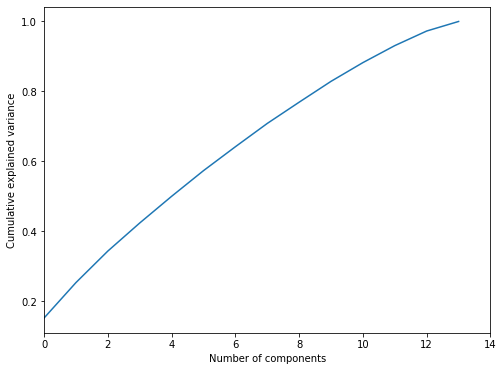

In [247]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

We can see that accuracy has significantly decreased to 0.8012 if I drop the last three features.
Our aim is to maximize the accuracy. We get maximum accuracy with the first 11 features and the accuracy is 0.8224.



#### I have demonstrated PCA implementation with Logistic Regression on the adult Income dataset

In [248]:
l=[]

In [249]:
X = df.drop(['Income','Native country'], axis=1)
y = df['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)




In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 82.39328488074521


In [251]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

SVM: 84.86027228989661


In [252]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 82.64919643771113


In [253]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

Decision Tree: 81.58460436073292


In [254]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

Naive Bayes: 80.6223769065411


In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 85.60753403623707
[[6871  536]
 [ 870 1492]]
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.74      0.63      0.68      2362

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Text(0.5, 0, 'Accuracy')

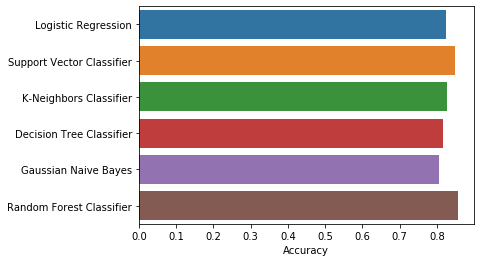

In [256]:
y_axis=['Logistic Regression',
     'Support Vector Classifier',
        'K-Neighbors Classifier',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

Conclusion:

I have demonstrated PCA implementation with Logistic Regression on the adult Income dataset

Ran Perdiction on  Different Classifiers

Found accuracy for each SVM and Randon Forest Produces the Best Results